# Data augmentation

The idea of data augmentation is to create additional training examples by applying sensible modifications to the data you have.

## Set up

Install dependencies

In [ ]:
import sys
!{sys.executable} -m pip install imgaug pandas

In [1]:
import os
from glob import glob
import pandas as pd
from tqdm import tqdm
from imgaug import augmenters as iaa

from utils import DataAugClass, plotAugmentation

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Apply augmentation

Transforms are common image transformations available in the `torchvision.transforms` module. However, these transforms are not optimal when dealing with segmentation maps.

[Imgaug](https://imgaug.readthedocs.io/en/latest/) is a library for image augmentation in machine learning experiments. It supports a wide range of augmentation techniques, allows to easily combine these and to execute them in random order or on multiple CPU cores, has a simple yet powerful stochastic interface and can not only augment images, but also keypoints/landmarks, bounding boxes, heatmaps and segmentation maps.

Another Python library commonly used is [Albumentations](https://albumentations.ai/).

In [4]:
# Define the directory paths where the images and the masks are saved
root = os.getcwd()
img_dir = root + '/output/viz_aug'
mask_dir = root + '/output/viz_aug'

# Load the filenames of the images to be augmented
csv_file = pd.read_csv(root + '/dataset/aug_dataset.csv').values

# Number of new images to be produced
N = 5

aug_data = DataAugClass(csv_file, img_dir, mask_dir)



print('Image filenames \n', csv_file)
print('Number of new images and masks to be produced:', N)

Image filenames 
 [['190927_Pr_D_M03_3']]
Number of new images and masks to be produced: 5


In [5]:
def augment(image, segmap, n):

    """
    Applies augmentation on an image and its mask to produce N new images and masks.

    Args:
            - image: PIL image.
            - segmap: object representing a segmentation map associated with the image.
            
    Outputs:
            - augmented
    """
        
    sometimes = lambda x: iaa.Sometimes(0.5, x)
    seq = iaa.Sequential(
                [
                    # apply the following augmenters to most images
                    iaa.Fliplr(0.5), # horizontally flip 50% of all images
                    iaa.Flipud(0.5), # vertically flip 50% of all images
                    
                    sometimes(iaa.Affine(
                        rotate=(-45,45), # rotate by 45 to 135 degrees
                        order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
                    )),

                    sometimes(iaa.Affine(scale=(0.5, 1.5))), #rescale from 50% (zoom in) ton 150% (zoom out)

                    # execute 0 to 3 of the following (less important) augmenters per image
                    # don't execute all of them, as that would often be way too strong
                    iaa.SomeOf((0, 3),
                        [
                            iaa.GaussianBlur((0, 1.3)), # blur images with a sigma between 0 and 3.0
                            iaa.WithBrightnessChannels(iaa.Add((-70, 50))), # change brightness of images (by -10 to 10 of original value)          
                            iaa.AdditiveGaussianNoise(scale=(0.05*255, 0.1*255)), #add Gaussian noise
                            # either change the brightness of the whole image (sometimes
                            
                            # per channel) or change the brightness of subareas
                            iaa.LinearContrast((0.8, 1.1)), # improve or worsen the contrast
                        ],
                        random_order=False
                    )
                ],
                random_order=False
        )

    augmented = [seq(image=image, segmentation_maps=segmap) for _ in range(n)]
    return augmented

In [6]:
for f in tqdm(aug_data.filenames):
            
    print('Processing image ', f,' ...')

    # Get full input path    
    imgPath = glob(aug_data.img_dir + '/cropped_' + f + '*')[0]
    maskPath = glob(aug_data.mask_dir + '/' + f + '*')[0]

    # Load the image and the mask as PIL image and segmap            
    image, segmap = aug_data.getImMk(imgPath, maskPath)

    # Apply the augmentation
    augmented = augment(image, segmap, N)

    # Save the results       
    aug_data.saveResults(augmented, f)

100%|██████████| 1/1 [00:06<00:00,  6.71s/it]


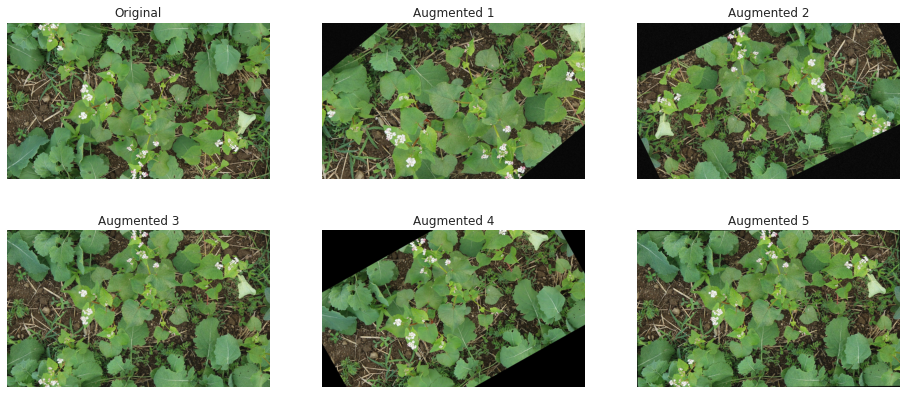

In [7]:
#Show example of the augmentation
img_paths = glob(img_dir + '/crop*')
plotAugmentation(img_paths)

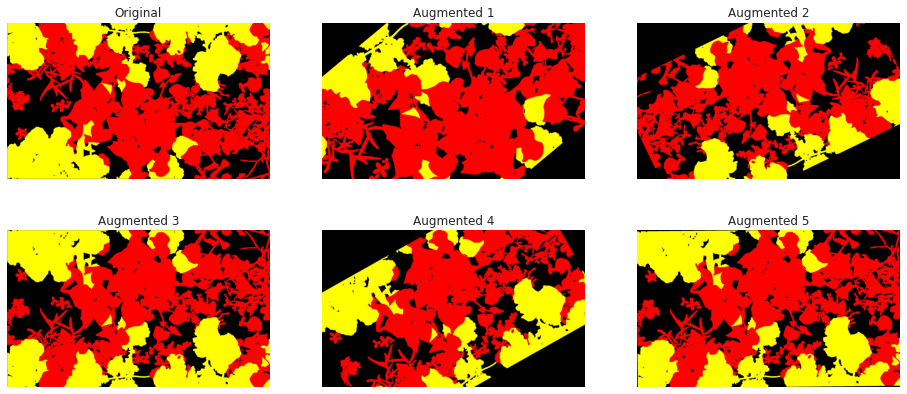

In [8]:
msk_paths = glob(img_dir + '/19*')
plotAugmentation(msk_paths)

## 3. Do it yourself

Now, let's see if you can apply your own data augmentation on the training dataset...

In [ ]:
# Define the directory paths where the images and the masks are saved
root = os.getcwd()
img_dir =  # YOUR CODE HERE
mask_dir = # YOUR CODE HERE

# Load the filenames of the images to be augmented
csv_file = # YOUR CODE HERE

# Define number of images to be produced
N = # YOUR CODE HERE

aug_data = # YOUR CODE HERE

print('Image filenames \n', csv_file)
print('Number of new images and masks to be produced:', N)

Complete `myCustomAugment` to define your own sequence of augmentations to apply for training the model.

If you want to introduce new transforms [here](https://imgaug.readthedocs.io/en/latest/source/overview_of_augmenters.html) are some more examples.

In [ ]:
def myCustomAugment(image, segmap, n):

    """
    Applies augmentation on an image and its mask to produce N new images and masks.

    Args:
            - image: PIL image.
            - segmap: object representing a segmentation map associated with the image.
            
    Outputs:
            - augmented
    """
        
    sometimes = lambda x: iaa.Sometimes(0.5, x)
    seq = iaa.Sequential(
                [   
                    # 
                    # YOUR CODE HERE
                    # 

                ],
                random_order=False
        )

    augmented = [seq(image=image, segmentation_maps=segmap) for _ in range(n)]
    return augmented

In [ ]:
for f in tqdm(aug_data.filenames):
            
    print('Processing image ', f,' ...')

    # Get full input path    
    imgPath = glob(aug_data.img_dir + '/cropped_' + f + '*')[0]
    maskPath = glob(aug_data.mask_dir + '/' + f + '*')[0]

    # Load the image and the mask as PIL image and segmap            
    image, segmap = #YOUR CODE HERE

    # Apply the augmentation
    augmented = # YOUR CODE HERE

    # Save the results       
    # YOUR CODE HERE